In [ ]:
pip install numpy

In [ ]:

pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163491 sha256=8f29a00699ba40a3b24c902c67f6ec7e23bd162418a3851e06ec0d9ca0e38a85
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
%matplotlib inline



from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time


import warnings
warnings.filterwarnings("ignore")

import pickle

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
df_movies = pd.read_csv('/content/drive/MyDrive/movies.csv')
df_imdb = pd.read_csv('/content/drive/MyDrive/imdb_data.csv')
df_gtags = pd.read_csv('/content/drive/MyDrive/genome_tags.csv')
df_scores = pd.read_csv('/content/drive/MyDrive/genome_scores.csv')
df_tags = pd.read_csv('/content/drive/MyDrive/tags.csv')
df_links = pd.read_csv('/content/drive/MyDrive/links.csv')

In [ ]:
df_imdb.info()
df_imdb.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game


In [ ]:
df_movies.info()
df_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:

df_gtags.info()
df_gtags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
df_scores.info()
df_scores.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375


In [ ]:
df_tags.info()
df_tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
df_links.info()
df_links.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
train.head()


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
duplicate_bool = train.duplicated(['userId', 'movieId', 'rating'])

print("Number of duplicate records:", sum(duplicate_bool))

Number of duplicate records: 0


In [ ]:
df_train = train
df_train.head(2)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739


In [ ]:

combined_df = df_train.merge(df_movies, on='movieId')

combined_df.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [ ]:
combined_df2 = df_train.merge(df_imdb, on="movieId")
combined_df2.head()

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [ ]:
combined_df3 = combined_df.merge(df_imdb, on="movieId" )
combined_df3.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [ ]:
combined_df3.isnull().sum()

userId                 0
movieId                0
rating                 0
timestamp              0
title                  0
genres                 0
title_cast       2604407
director         2602688
runtime          2653058
budget           3152276
plot_keywords    2610043
dtype: int64

In [ ]:
combined_df3['plot_keywords'].tail(100)

9632931                                                NaN
9632932    sex|male frontal nudity|prostitution|perversity
9632933                                     color in title
9632934                                                NaN
9632935         murder|serial killer|peeping|female nudity
                                ...                       
9633026                                                NaN
9633027      janitor|income|housing problem|social problem
9633028                                                NaN
9633029                     soldier|italy|partisan|fascist
9633030             genius|artist|greek american|direction
Name: plot_keywords, Length: 100, dtype: object

In [ ]:
train['rating'].unique()

array([4. , 4.5, 5. , 2. , 3. , 1. , 3.5, 2.5, 0.5, 1.5])

In [ ]:
train['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [ ]:
rating_per_user = df_train.groupby('userId')['rating'].count().reset_index().sort_values('rating', ascending = False)
rating_per_user.head()

,userId,rating
72314,72315,12952
80973,80974,3680
137292,137293,3588
33843,33844,3208
20054,20055,3050


In [ ]:
import plotly.graph_objects as go

In [ ]:
data = combined_df['rating'].value_counts().sort_index(ascending=False)

trace = go.Bar(x=data.index,
               text=['{:.1f} %'.format(val) for val in (data.values / combined_df.shape[0] * 100)],
               textposition='auto',
               textfont=dict(color='#000000'),
               y=data.values,
               marker=dict(color='#db0000'))
layout = dict(title='Distribution Of {} movie-ratings'.format(combined_df.shape[0]),
              xaxis=dict(title='rating'),
              yaxis=dict(title='Count'))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [ ]:
ranked_movies = combined_df3.groupby('title')['rating'].mean().sort_values(ascending = False)
ranked_movies.head()

title
Wrestling for Jesus: The Tale of T-Money (2011)    5.0
The... Beautiful Country (1977)                    5.0
Only Daughter (2013)                               5.0
Vasermil (2007)                                    5.0
Day the Universe Changed, The (1985)               5.0
Name: rating, dtype: float64

In [ ]:
combined_df3.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)
num_ratings = pd.DataFrame(combined_df3.groupby('movieId').count()['rating']).reset_index()
combined_df3 = pd.merge(left=combined_df3, right=num_ratings, on='movieId')
combined_df3.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)

In [ ]:
combined_df3['budget'] = combined_df3['budget'].astype(str)

combined_df3['budget'] = combined_df3['budget'].str.replace(',', '')

combined_df3['budget'] = combined_df3['budget'].str.replace('[$£]', '', regex=True)

combined_df3['budget'] = pd.to_numeric(combined_df3['budget'], errors='coerce')


combined_df3['budget'] = combined_df3['budget'].fillna(0)


In [ ]:
combined_df3['release_year'] = combined_df3.title.str.extract('(\(\d\d\d\d\))', expand=False)

combined_df3['release_year'] = combined_df3.release_year.str.extract('(\d\d\d\d)', expand=False)

combined_df3.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,numRatings,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000.0,dwarf|bruges|irish|hitman,4253,2008
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000.0,dwarf|bruges|irish|hitman,4253,2008


In [ ]:
data_1= combined_df3.drop_duplicates('movieId')

data_1.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,numRatings,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,15000000.0,dwarf|bruges|irish|hitman,4253,2008
4253,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,30000000.0,fatherhood|doberman|dog|mansion,4648,1995


In [ ]:
import matplotlib.pyplot as plt

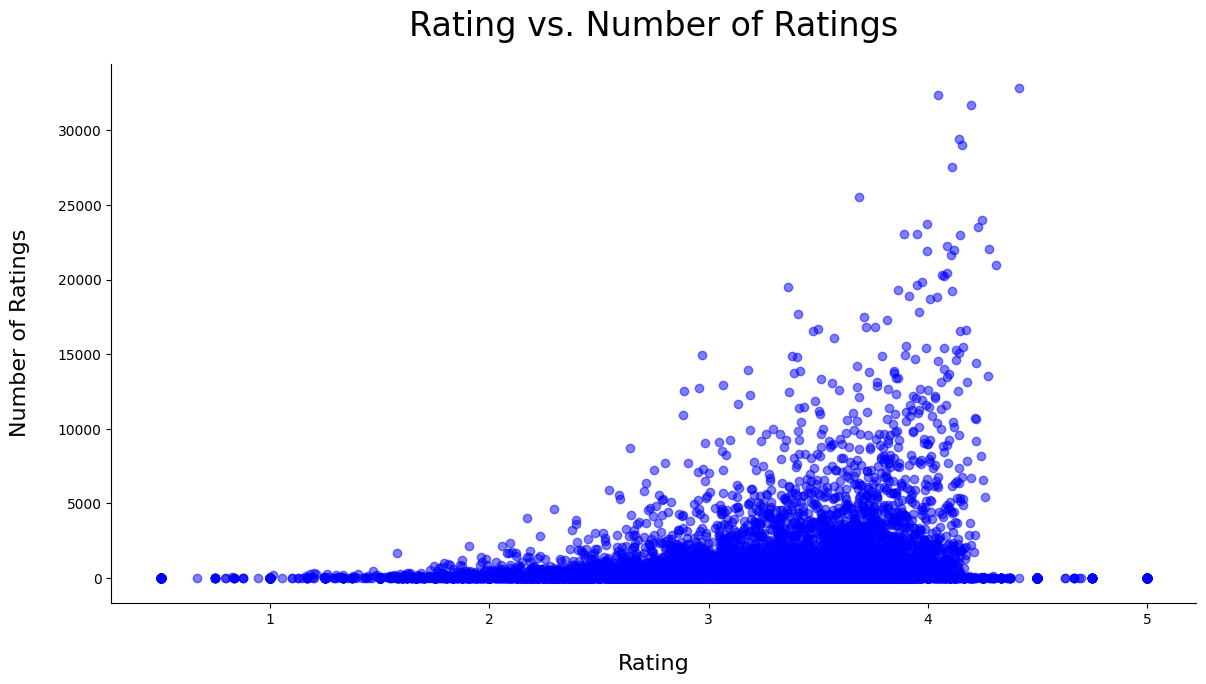

In [ ]:
ratings_df = pd.DataFrame()

ratings_df['Mean_Rating'] = combined_df3.groupby('title')['rating'].mean().values

ratings_df['Num_Ratings'] = combined_df3.groupby('title')['rating'].count().values

fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Rating vs. Number of Ratings', fontsize=24, pad=20)
ax.set_xlabel('Rating', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.5, color='blue')

In [ ]:
list_list =list(df_movies['genres'].str.split('|'))
genres_list = []
for i in list_list:
    for j in i:
        genres_list.append(j)
print(genres_list[0:11])
print(len(genres_list))

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Adventure', 'Children', 'Fantasy', 'Comedy', 'Romance', 'Comedy']
112307


In [41]:
genres_list = pd.DataFrame(genres_list)
genres_list.rename(columns ={0:'genres'},inplace = True)
genres_list.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112307 entries, 0 to 112306
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   genres  112307 non-null  object
dtypes: object(1)
memory usage: 877.5+ KB


In [42]:
genres_counted = pd.DataFrame(genres_list['genres'].value_counts())

In [43]:
genres_counted.reset_index(inplace = True)
genres_counted.rename(columns = {'index':'genres','genres': 'count'}, inplace = True)
genres_counted.head()


,genres,count
0,Drama,25606
1,Comedy,16870
2,Thriller,8654
3,Romance,7719
4,Action,7348


In [44]:
genome_df = pd.merge(df_scores, df_gtags, how = 'left', on = 'tagId')
genome_df.head()

,movieId,tagId,relevance,tag
0,1,1,0.02875,007
1,1,2,0.02375,007 (series)
2,1,3,0.06250,18th century
3,1,4,0.07575,1920s
4,1,5,0.14075,1930s


In [45]:
df_genre_tag = genome_df.merge(df_movies, on = 'movieId', how = 'outer')
df_genre_tag.head(2)

,movieId,tagId,relevance,tag,title,genres
0,1,1.0,0.02875,007,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2.0,0.02375,007 (series),Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

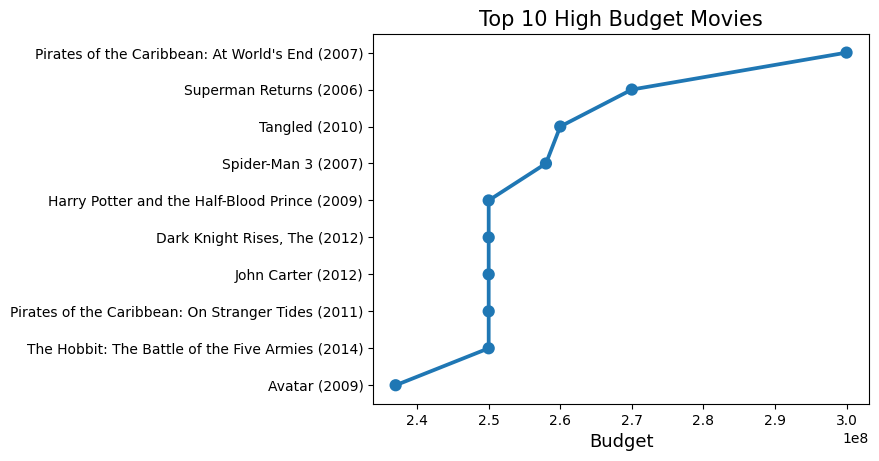

In [47]:
info = pd.DataFrame(data_1['budget'].sort_values(ascending = False))
info['title'] = data_1['title']
data = list(map(str,(info['title'])))

x = list(data[:10])
y = list(info['budget'][:10])

ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

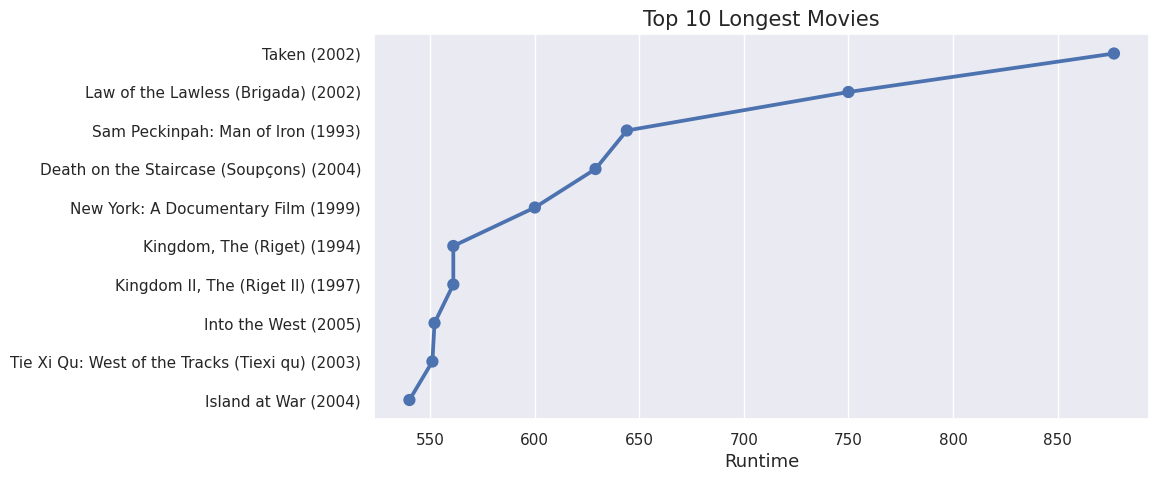

In [48]:
#top 10 Movies With Longest runtime
info = pd.DataFrame(data_1['runtime'].sort_values(ascending = False))
info['title'] = data_1['title']
data = list(map(str,(info['title'])))

x = list(data[:10])
y = list(info['runtime'][:10])

ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

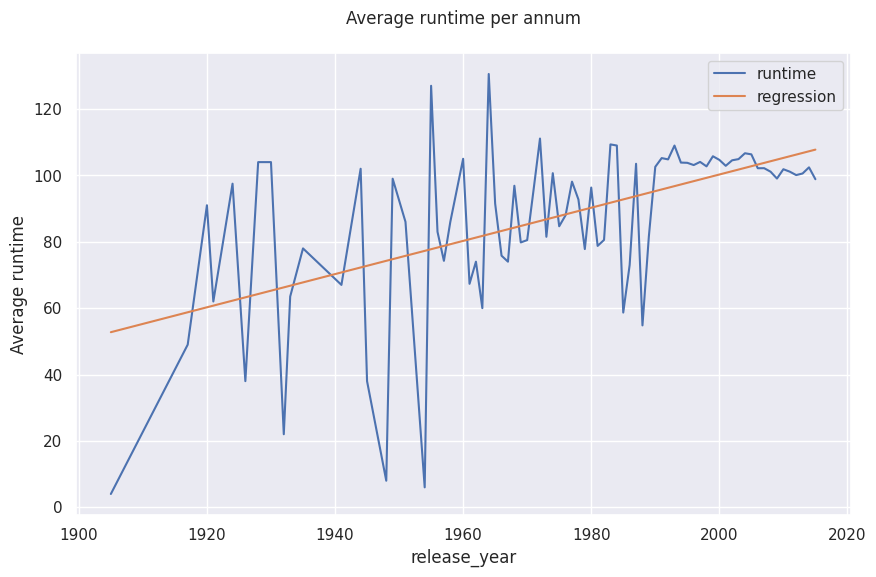

In [49]:
from sklearn.linear_model import LinearRegression

# create a dataframe with runtime data
runtime_data = pd.DataFrame(data_1.dropna().groupby('release_year').mean()['runtime']).dropna()
runtime_data.index = runtime_data.index.astype('int')
runtime_data = runtime_data[runtime_data['runtime']>1].copy()

lrm = LinearRegression()
runtime_data = runtime_data.reset_index()
lrm.fit(runtime_data.release_year.values.reshape(-1,1),runtime_data.runtime.values.reshape(-1,1))

runtime_data['regression'] = lrm.predict(runtime_data.release_year.values.reshape(-1,1))

runtime_data = runtime_data.set_index('release_year')
runtime_data.plot(figsize=(10,6))
plt.title("Average runtime per annum\n")
plt.ylabel("Average runtime")
plt.show()

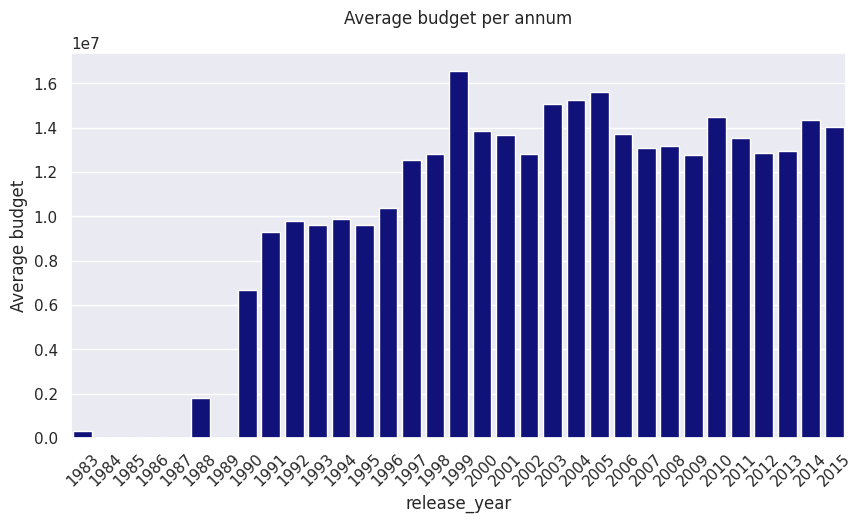

In [51]:
# create a dataframe with budget data
budget_data = pd.DataFrame(data_1.dropna().groupby('release_year').mean()['budget']).dropna()
budget_data.index = budget_data.index.astype('int')
runtime_data = budget_data[budget_data['budget']>1].copy()

budget_data = budget_data.reset_index()
budget_data = budget_data.drop('budget',1).merge(pd.DataFrame(budget_data[budget_data['release_year']>1982]), on ='release_year')

plt.figure(figsize=(10,5))
sns.barplot(x='release_year',y='budget',data=budget_data, color='darkblue')
plt.title("Average budget per annum\n")
plt.ylabel("Average budget")
plt.xticks(rotation=45)
plt.show()

In [52]:
def plot_correlation_map( df ):

    """"
    This function gives a correlation map
    using all the features from merged data.

    Input : dataframe column
    datatype : dataframe (integer)

    output : Figure (bar plot)

    """
    # Plotting using the features

    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

In [53]:
movies = df_movies

In [55]:
df_1 = df_imdb[['movieId','title_cast','director', 'plot_keywords']]
df_1 = df_1.merge(movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df_1.head(2)

,movieId,title_cast,director,plot_keywords,genres,title
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game,Adventure|Children|Fantasy,Jumanji (1995)


In [56]:
# Convert data types to strings for string handling
df_1['title_cast'] = df_1.title_cast.astype(str)
df_1['plot_keywords'] = df_1.plot_keywords.astype(str)
df_1['genres'] = df_1.genres.astype(str)
df_1['director'] = df_1.director.astype(str)

df_1['director'] = df_1['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df_1['title_cast'] = df_1['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

df_1['title_cast'] = df_1['title_cast'].map(lambda x: x.split('|'))

df_1['plot_keywords'] = df_1['plot_keywords'].map(lambda x: x.split('|'))
df_1['plot_keywords'] = df_1['plot_keywords'].apply(lambda x: " ".join(x))

df_1['genres'] = df_1['genres'].map(lambda x: x.lower().split('|'))
df_1['genres'] = df_1['genres'].apply(lambda x: " ".join(x))

df_1.head()

,movieId,title_cast,director,plot_keywords,genres,title
0,1,"[tomhanks, timallen, donrickles, jimvarney, wa...",johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995)
1,2,"[robinwilliams, jonathanhyde, kirstendunst, br...",jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995)
2,3,"[waltermatthau, jacklemmon, sophialoren, ann-m...",markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995)
3,4,"[whitneyhouston, angelabassett, lorettadevine,...",terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995)
4,5,"[stevemartin, dianekeaton, martinshort, kimber...",alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995)


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from surprise.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from surprise.model_selection import GridSearchCV

In [58]:
df_1['liststring'] = df_1['title_cast'].apply(lambda x: ','.join(map(str, x)))

df_1['liststring'] = df_1['liststring'].replace(',',' ', regex=True)

df_features = df_1[['liststring','director','plot_keywords','genres']]

df_1['combined_features'] = df_features['liststring'] +' '+ df_features['director'] +' '+ df_features['plot_keywords'] +' '+ df_features['genres']

cv =CountVectorizer()
cv_matrix = cv.fit_transform(df_1['combined_features'])

#now we obtain the cosine similarity matrix from the cv matrix
sim_score = cosine_similarity(cv_matrix,cv_matrix)

df_1.set_index('title', inplace = True)
indices = pd.Series(df_1.index)

In [59]:
print(sim_score)

[[1.         0.10910895 0.07715167 ... 0.03026138 0.         0.07881104]
 [0.10910895 1.         0.         ... 0.06163336 0.         0.08025724]
 [0.07715167 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.03026138 0.06163336 0.         ... 1.         0.         0.03338903]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.07881104 0.08025724 0.         ... 0.03338903 0.         1.        ]]


In [60]:
#Method to get recommenations
def recommendations(title,n,sim_score = sim_score):
    '''
    This method returns movies which are similar.

    Input:
        title: name of the movie to be compared
        n: number(quantity) of movies to be returned
        sim_core: similarity score
    Output:
        recommend movies
    '''

    recommended_movies = []

    idx = indices[indices == title].index[0]

    score_series = pd.Series(sim_score[idx]).sort_values(ascending = False)

    top_n_indexes = list(score_series.iloc[1:n+1].index)

    for i in top_n_indexes:
        recommended_movies.append(list(df_1.index)[i])

    return recommended_movies

In [61]:
recommendations('Innocence (2014)',10)

['King Kong (1933)',
 'Zu: Warriors from the Magic Mountain (Xin shu shan jian ke) (1983)',
 'Island of Dr. Moreau, The (1977)',
 'The Man in the Orange Jacket (2014)',
 'She (1965)',
 'Printed Rainbow (2006)',
 'MirrorMask (2005)',
 'Seventh Son (2014)',
 'The Prophecy: Forsaken (2005)',
 'The Damned (2014)']

In [62]:
# Load reader and data in Surprise dataframe
df_train = train.copy()
reader = Reader(rating_scale = (0.5, 5))
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

In [63]:

trainset, testset = train_test_split(data, test_size=0.1)

In [64]:
# Base algorithm
algo = SVD()
algo.fit(trainset)

In [65]:
# Using the 10% testset to make predictions
predictions = algo.test(testset)
predictions

test = pd.DataFrame(predictions)

In [66]:

test.head()

,uid,iid,r_ui,est,details
0,159395,1805,3.0,3.111852,{'was_impossible': False}
1,69693,1073,5.0,4.111816,{'was_impossible': False}
2,130284,58,5.0,4.672666,{'was_impossible': False}
3,28776,115617,3.5,4.432589,{'was_impossible': False}
4,91928,2005,4.0,3.878586,{'was_impossible': False}


In [67]:
ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in test_df.iterrows()]
ratings_predictions

[Prediction(uid=1, iid=2011, r_ui=None, est=3.089682575557945, details={'was_impossible': False}),
 Prediction(uid=1, iid=4144, r_ui=None, est=4.355548758994347, details={'was_impossible': False}),
 Prediction(uid=1, iid=5767, r_ui=None, est=3.388721437663148, details={'was_impossible': False}),
 Prediction(uid=1, iid=6711, r_ui=None, est=4.045082530843054, details={'was_impossible': False}),
 Prediction(uid=1, iid=7318, r_ui=None, est=3.304385002219601, details={'was_impossible': False}),
 Prediction(uid=1, iid=8405, r_ui=None, est=3.829216369124501, details={'was_impossible': False}),
 Prediction(uid=1, iid=8786, r_ui=None, est=4.103997105862923, details={'was_impossible': False}),
 Prediction(uid=2, iid=150, r_ui=None, est=3.36055650859955, details={'was_impossible': False}),
 Prediction(uid=2, iid=356, r_ui=None, est=3.8287895224630173, details={'was_impossible': False}),
 Prediction(uid=2, iid=497, r_ui=None, est=3.5860429036321473, details={'was_impossible': False}),
 Prediction(

In [68]:

df_pred=pd.DataFrame(ratings_predictions)
df_pred

,uid,iid,r_ui,est,details
0,1,2011,None,3.089683,{'was_impossible': False}
1,1,4144,None,4.355549,{'was_impossible': False}
2,1,5767,None,3.388721,{'was_impossible': False}
3,1,6711,None,4.045083,{'was_impossible': False}
4,1,7318,None,3.304385,{'was_impossible': False}
...,...,...,...,...,...
5000014,162541,4079,None,3.143883,{'was_impossible': False}
5000015,162541,4467,None,3.982316,{'was_impossible': False}
5000016,162541,4980,None,2.951841,{'was_impossible': False}
5000017,162541,5689,None,3.116052,{'was_impossible': False}


In [69]:

df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [70]:

df_pred.head()

,userId,movieId,rating
0,1,2011,3.089683
1,1,4144,4.355549
2,1,5767,3.388721
3,1,6711,4.045083
4,1,7318,3.304385


In [71]:

df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [72]:
# View the first five rows of the dataframe
df_pred.head()

,userId,movieId,rating,Id
0,1,2011,3.089683,1_2011
1,1,4144,4.355549,1_4144
2,1,5767,3.388721,1_5767
3,1,6711,4.045083,1_6711
4,1,7318,3.304385,1_7318


In [73]:

df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [74]:

df_pred = df_pred[['Id', 'rating']]

In [75]:

df_pred.head()

,Id,rating
0,1_2011,3.089683
1,1_4144,4.355549
2,1_5767,3.388721
3,1_6711,4.045083
4,1_7318,3.304385


In [76]:
# View the shape of the dataset to be submitted
df_pred.shape

(5000019, 2)

In [80]:
# The submitted model
df_pred.to_csv("Thandokazi_Dlamini.csv", index=False)